In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [2]:
df=pd.read_csv('comments_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [4]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into a single string
    return ' '.join(words)

In [5]:
# Preprocess the data
df['comment'] = df['comment'].str.lower()
df = df[['comment', 'posted date']]  # Keep only relevant columns


In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['posted date'], test_size=0.2, random_state=42)


In [7]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [8]:
# Create and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [9]:
# Make predictions on the test data
y_pred = classifier.predict(X_test_tfidf)


In [10]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a classification report
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

    April 14       1.00      1.00      1.00      1498

    accuracy                           1.00      1498
   macro avg       1.00      1.00      1.00      1498
weighted avg       1.00      1.00      1.00      1498



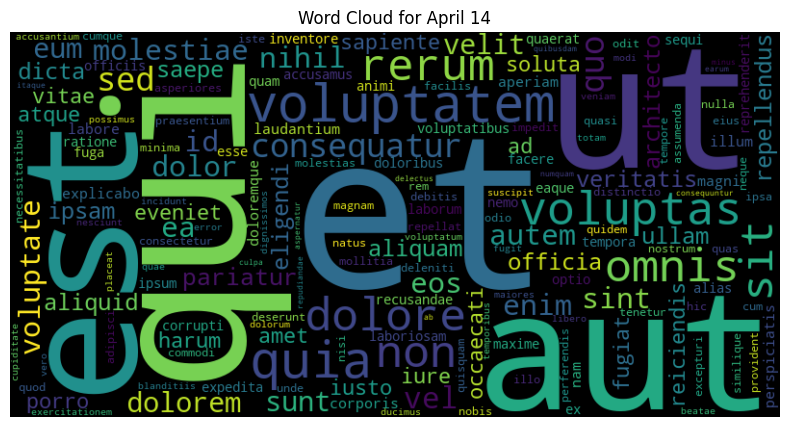

In [11]:
from wordcloud import WordCloud

# Create word clouds for each category
class_labels = df['posted date'].unique()
for label in class_labels:
    subset = df[df['posted date'] == label]['comment']
    wordcloud = WordCloud(width=800, height=400).generate(' '.join(subset))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label}')
    plt.axis('off')
    plt.show()


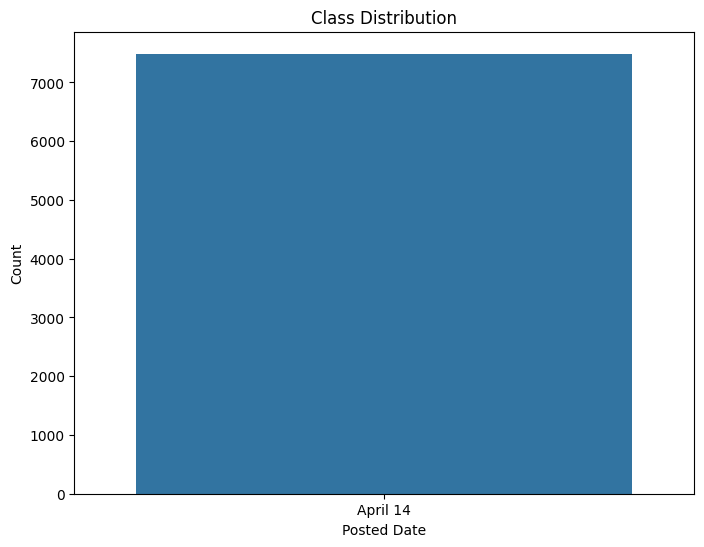

In [12]:
# Plot the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='posted date')
plt.xlabel('Posted Date')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


C:\Users\gadde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


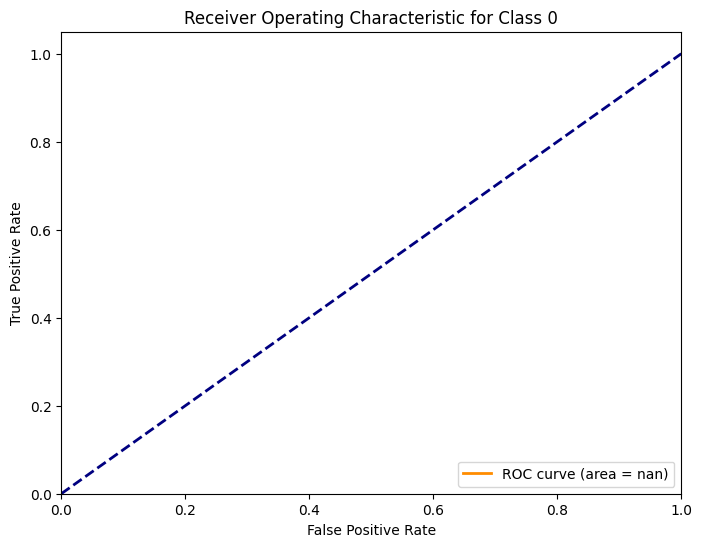

In [13]:
# Check if it's a multiclass classification problem
if len(df['posted date'].unique()) > 2:
    print("ROC curve is not applicable for multiclass classification.")
else:
    # Calculate ROC curve and AUC for a specific class (e.g., class 0)
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test_tfidf)[:, 0], pos_label=0)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Class 0')
    plt.legend(loc='lower right')
    plt.show()
